# Performance of encoder-decoder based movie recommendation system


 ## Tune param(num of hidden layers)

In [1]:
import tensorflow as tf
from train_ import train

/Users/chenxijia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
test_layer={}
for layer in range(3,22,3):
    tr = train(num_layer=layer, reg = 'L1')
    test_layer[layer]=tr.train(None)

num_layer: 3, epoch_nr: 0, train_loss: 2.288, test_loss: 1.173
num_layer: 3, epoch_nr: 5, train_loss: 1.514, test_loss: 1.054
num_layer: 3, epoch_nr: 10, train_loss: 1.349, test_loss: 1.036
num_layer: 3, epoch_nr: 15, train_loss: 1.218, test_loss: 1.030
num_layer: 3, epoch_nr: 20, train_loss: 1.147, test_loss: 1.006
num_layer: 3, epoch_nr: 25, train_loss: 1.085, test_loss: 1.005
num_layer: 3, epoch_nr: 30, train_loss: 1.061, test_loss: 1.002
num_layer: 6, epoch_nr: 0, train_loss: 2.273, test_loss: 1.146
num_layer: 6, epoch_nr: 5, train_loss: 1.451, test_loss: 1.026
num_layer: 6, epoch_nr: 10, train_loss: 1.266, test_loss: 1.005
num_layer: 6, epoch_nr: 15, train_loss: 1.153, test_loss: 0.999
num_layer: 6, epoch_nr: 20, train_loss: 1.085, test_loss: 0.990
num_layer: 6, epoch_nr: 25, train_loss: 1.058, test_loss: 0.994
num_layer: 6, epoch_nr: 30, train_loss: 1.029, test_loss: 0.986
num_layer: 9, epoch_nr: 0, train_loss: 2.220, test_loss: 1.066
num_layer: 9, epoch_nr: 5, train_loss: 1.270,

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

X = [3,6,9,12,15,18,21]
Y = [[0]*7 for i in range(7)]

for j in range(7):
    for i in range(len(X)):
        Y[j][i] = test_layer[X[i]][j][2]
    
plt.figure(figsize=(9, 6), dpi=80)
ax = plt.subplot(111)
for j in range(len(Y)-1):
    ax.plot(X,Y[j],label='num of epoch='+str(j*5),linewidth=3)

ax.legend(numpoints=1, loc = 1)
plt.xlabel('Num of Hidden Layers')
plt.ylabel('RMSE')
plt.title('When num of epoch is 20, relationship between num of layers and RMSE')
plt.show()

<Figure size 720x480 with 1 Axes>

#### We can conclude that more hidden layers is good to our model performance, which means RMSE will decrease. However, we also see that high num of hidden layers(>18) is easy to lead to overfitting. Therefore, we can conclude that the best parameter of num_layers and num_epoch is around (12~16) and (20~25).

## Tune param(activation function)

In [6]:
import tensorflow as tf
from train_ import train

In [7]:
tr = train(num_layer=6, reg = 'L1', act_func='Sigmoid')
X = [0,5,10,15,20,25,30]
Y_sigmoid = tr.train(None)


num_layer: 6, epoch_nr: 0, train_loss: 1.974, test_loss: 0.996
num_layer: 6, epoch_nr: 5, train_loss: 1.434, test_loss: 1.021
num_layer: 6, epoch_nr: 10, train_loss: 1.427, test_loss: 1.025
num_layer: 6, epoch_nr: 15, train_loss: 1.424, test_loss: 1.024
num_layer: 6, epoch_nr: 20, train_loss: 1.420, test_loss: 1.024
num_layer: 6, epoch_nr: 25, train_loss: 1.417, test_loss: 1.021
num_layer: 6, epoch_nr: 30, train_loss: 1.412, test_loss: 1.024


In [8]:
Y_relu = test_layer[6]

In [9]:
temp1,temp2 = [],[]
for i in range(len(Y_relu)):
    temp1.append(Y_relu[i][2])
    temp2.append(Y_sigmoid[i][2])
Y_relu,Y_sigmoid = temp1,temp2

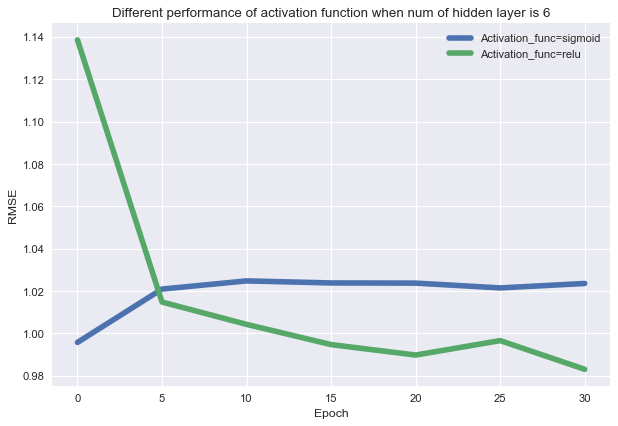

In [10]:
plt.figure(figsize=(9, 6), dpi=80)
ax = plt.subplot(111)
ax.plot(X,Y_sigmoid,label='Activation_func=sigmoid',linewidth=5)
ax.plot(X,Y_relu,label='Activation_func=relu',linewidth=5)
ax.legend(numpoints=1, loc = 1)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Different performance of activation function when num of hidden layer is 6')
plt.show()

#### We can see that as the number of epoch gets higher, model using Relu fuction performs better and better, also better than the model using sigmoid function. While model using sigmoid's performance is relatively stable as number of epoch getting higher.

## Tune param(regularization term)

In [11]:
import tensorflow as tf
from train_ import train

In [12]:
tr = train(num_layer=6, reg = 'L2')
X = [0,5,10,15,20,25,30]
Y_L2 = tr.train(None)

num_layer: 6, epoch_nr: 0, train_loss: 1.601, test_loss: 1.136
num_layer: 6, epoch_nr: 5, train_loss: 0.979, test_loss: 1.001
num_layer: 6, epoch_nr: 10, train_loss: 0.978, test_loss: 0.993
num_layer: 6, epoch_nr: 15, train_loss: 0.967, test_loss: 0.992
num_layer: 6, epoch_nr: 20, train_loss: 0.937, test_loss: 1.002
num_layer: 6, epoch_nr: 25, train_loss: 0.915, test_loss: 1.010
num_layer: 6, epoch_nr: 30, train_loss: 0.905, test_loss: 1.022


In [13]:
Y_L1 = test_layer[6]

In [14]:
temp1,temp2 = [],[]
for i in range(len(Y_L1)):
    temp1.append(Y_L1[i][2])
    temp2.append(Y_L2[i][2])
Y_L1,Y_L2= temp1,temp2

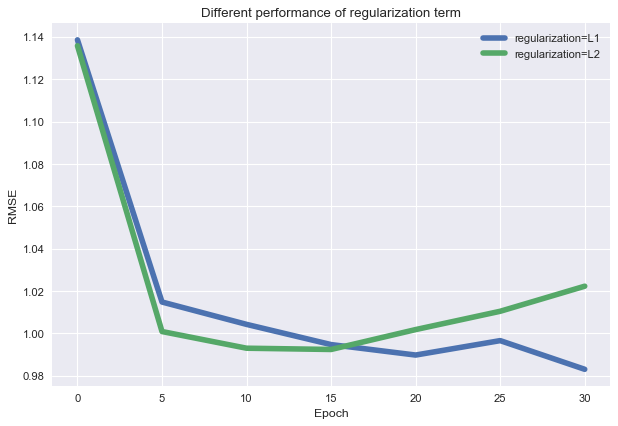

In [15]:
plt.figure(figsize=(9, 6), dpi=80)
ax = plt.subplot(111)
ax.plot(X,Y_L1,label='regularization=L1',linewidth=5)
ax.plot(X,Y_L2,label='regularization=L2',linewidth=5)
ax.legend(numpoints=1, loc = 1)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Different performance of regularization term')
plt.show()

#### We can see that L21regularization slightly performs better than L2 regularization and L2 is easier to lead to overfitting.

## Implement batch normalizaition

In [16]:
tr = train(num_layer=3,reg = 'L2', act_func = 'Sigmoid', batch_norm = True)
X = [0,5,10,15,20,25,30]
Y_norm = tr.train(None)

num_layer: 3, epoch_nr: 0, train_loss: 0.171, test_loss: 0.023
num_layer: 3, epoch_nr: 5, train_loss: 0.001, test_loss: 0.018
num_layer: 3, epoch_nr: 10, train_loss: 0.001, test_loss: 0.016
num_layer: 3, epoch_nr: 15, train_loss: 0.001, test_loss: 0.016
num_layer: 3, epoch_nr: 20, train_loss: 0.001, test_loss: 0.016
num_layer: 3, epoch_nr: 25, train_loss: 0.001, test_loss: 0.016
num_layer: 3, epoch_nr: 30, train_loss: 0.001, test_loss: 0.016


In [21]:
temp1 = []
for i in range(len(Y_norm)):
    temp1.append(Y_norm[i][2])
    temp2.append(Y_norm[i][2])
Y_norm= temp1

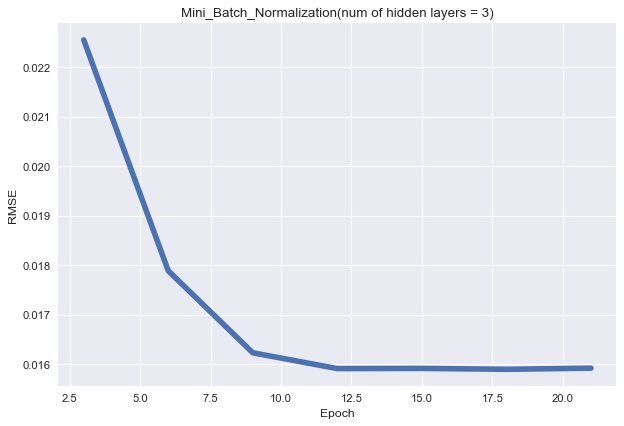

In [23]:
plt.figure(figsize=(9, 6), dpi=80)
ax = plt.subplot(111)
ax.plot(X,Y_norm,linewidth=5)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Mini_Batch_Normalization(num of hidden layers = 3)')
plt.show()

#### Due to batch normalization, the RMSE becomes very small and stable when the number of epoch gets higher.